In [6]:
# Istanciando o Google Drive
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/path_to_your_images_folder'
model_path = '/content/drive/MyDrive/path_to_your_model/model.h5'


from google.colab import drive
drive.mount('/content/drive')

dataset_dir = '/content/drive/MyDrive/checkpoints/dataset_web'
model_path = '/content/drive/MyDrive/checkpoints/global_solution.h5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregando o modelo
model = load_model(model_path)

In [7]:
# Carregando as imagens
image_height, image_width = 128, 128
batch_size = 100

datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 8 images belonging to 2 classes.


In [8]:
#Realizando as predições
predictions = model.predict(test_generator)

1/1 [==============================] - 1s 720ms/step


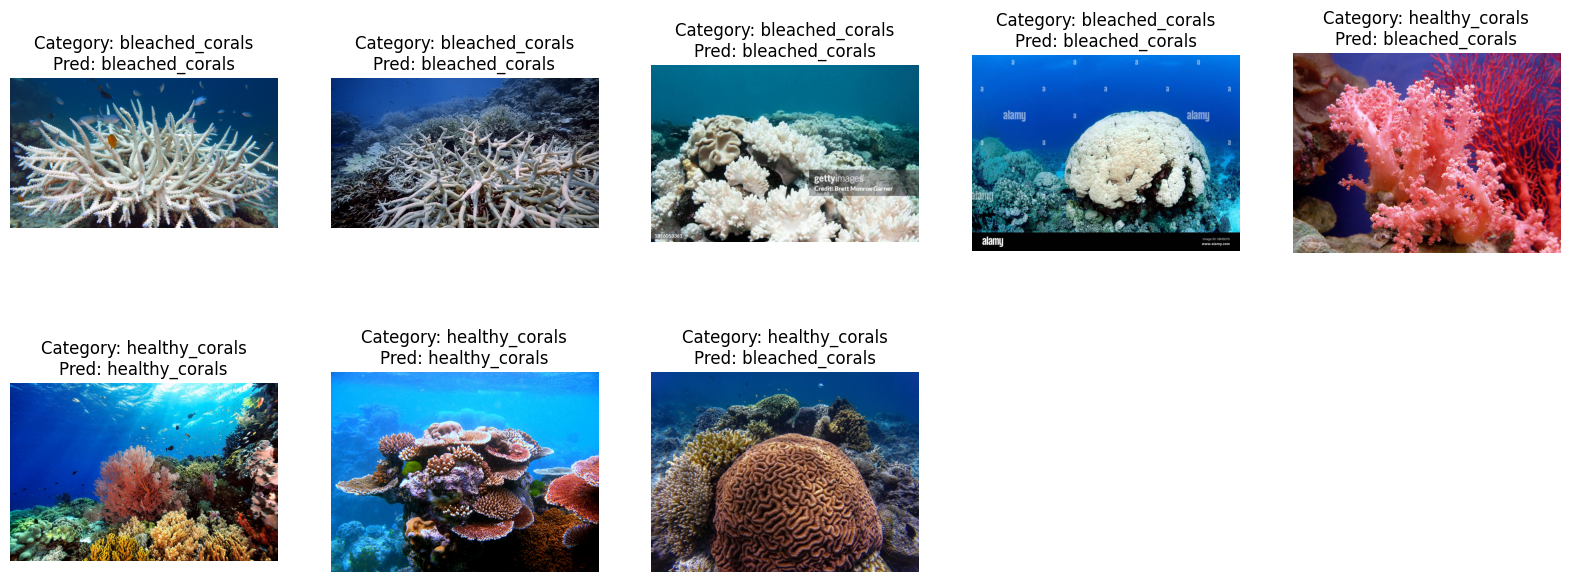

In [17]:
#Plot de resultados
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Se suas classes são categóricas, use:
predicted_classes = np.argmax(predictions, axis=1)

# Obter os nomes dos arquivos das imagens
filenames = test_generator.filenames
class_labels = list(test_generator.class_indices.keys())

# Definir o número de imagens que você quer plotar
num_images_to_plot = 8

plt.figure(figsize=(20, 20))
for i in range(num_images_to_plot):
    img_path = os.path.join(dataset_dir, filenames[i])
    img = mpimg.imread(img_path)

    # Extrair o nome da categoria original (nome da pasta)
    original_category = os.path.basename(os.path.dirname(img_path))

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Category: {original_category}\nPred: {class_labels[predicted_classes[i]]}')
    plt.axis('off')

plt.show()